#                                                         Assignment 2

## Goal of the Assignment :-

### In this assignment we will be performing regression and ensemble methods on the "tips" dataset to enhance our understanding of tipping behavior, helping tailor services and optimize operations and develop a predictive model to estimate tip amounts in restaurants based on customer billing and demographic details

## Importing Libraries :-

In [91]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data file :-

In [92]:
data = pd.read_csv('tips.csv')
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


(   total_bill   tip     sex smoker  day    time  size
 0       16.99  1.01  Female     No  Sun  Dinner     2
 1       10.34  1.66    Male     No  Sun  Dinner     3
 2       21.01  3.50    Male     No  Sun  Dinner     3
 3       23.68  3.31    Male     No  Sun  Dinner     2
 4       24.59  3.61  Female     No  Sun  Dinner     4,
 None)

## Preprocessing of Data:-

### We will apply label encoding on the columns with categorical variables for the purpose of modelling.

In [93]:
encoded_data = data.copy()
label_encoders = {}
for column in ['sex', 'smoker', 'day', 'time']:
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(encoded_data[column])
    label_encoders[column] = le 

### Now our dataset is ready, we can start performing the analysis.

## Analysis of Data :-

### Checking for Correlation :-

In [94]:
correlation_matrix = encoded_data.corr()
correlation_with_tip = correlation_matrix["tip"].sort_values(ascending=False)
correlation_with_tip

tip           1.000000
total_bill    0.675734
size          0.489299
sex           0.088862
smoker        0.005929
day          -0.011548
time         -0.121629
Name: tip, dtype: float64

### The initial correlation analysis reveals the following relationships with the tip amount:
A) Strongest positive correlation: total_bill (0.68) and size (0.49), indicating that larger bills and party sizes generally result in higher tips.

B) Weaker correlations: Categorical variables (sex, smoker, day, and time) show low or near-zero correlation with tip amount, which suggests they may have less impact individually.

### Relation between "Total Bill" and "Tip" :-

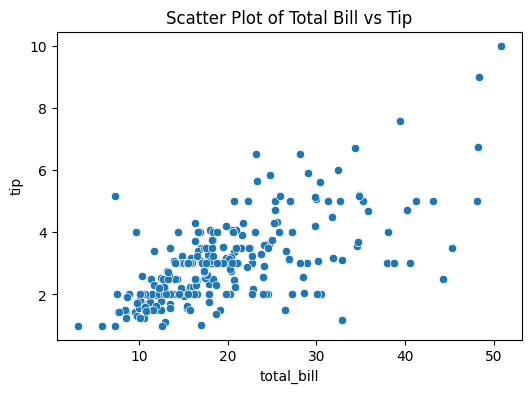

In [95]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=encoded_data, x='total_bill', y='tip')
plt.title("Scatter Plot of Total Bill vs Tip")
plt.show()

### Relation between "Size" and "Tip" :-

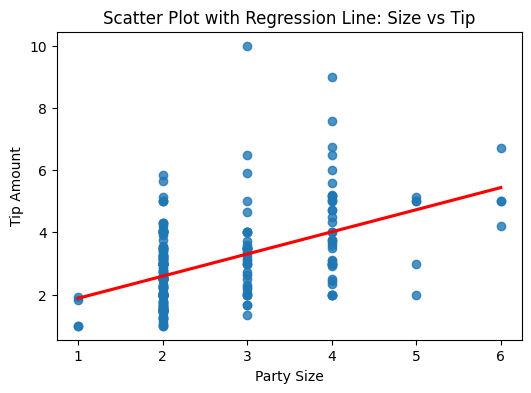

In [96]:
plt.figure(figsize=(6, 4))
sns.regplot(x='size', y='tip', data=encoded_data, ci=None, line_kws={"color": "red"})
plt.title("Scatter Plot with Regression Line: Size vs Tip")
plt.xlabel("Party Size")
plt.ylabel("Tip Amount")
plt.show()

### Heat map for analysing the correlation of "Tip" with other Categorical Variables

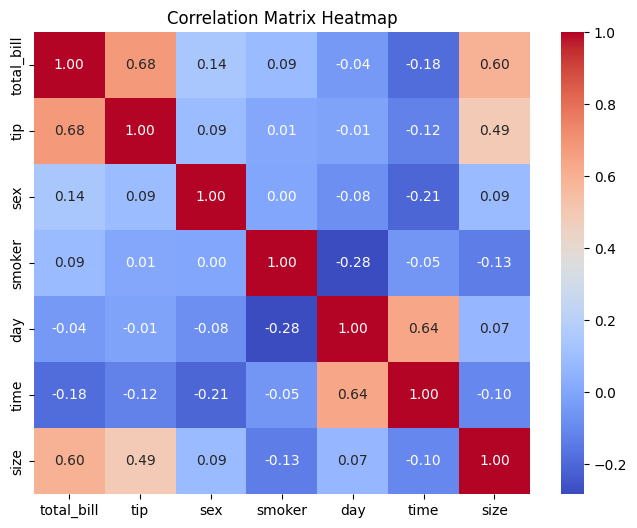

In [97]:
plt.figure(figsize=(8, 6))
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

### Analysing the 'Tips' with all the Categorical data :-

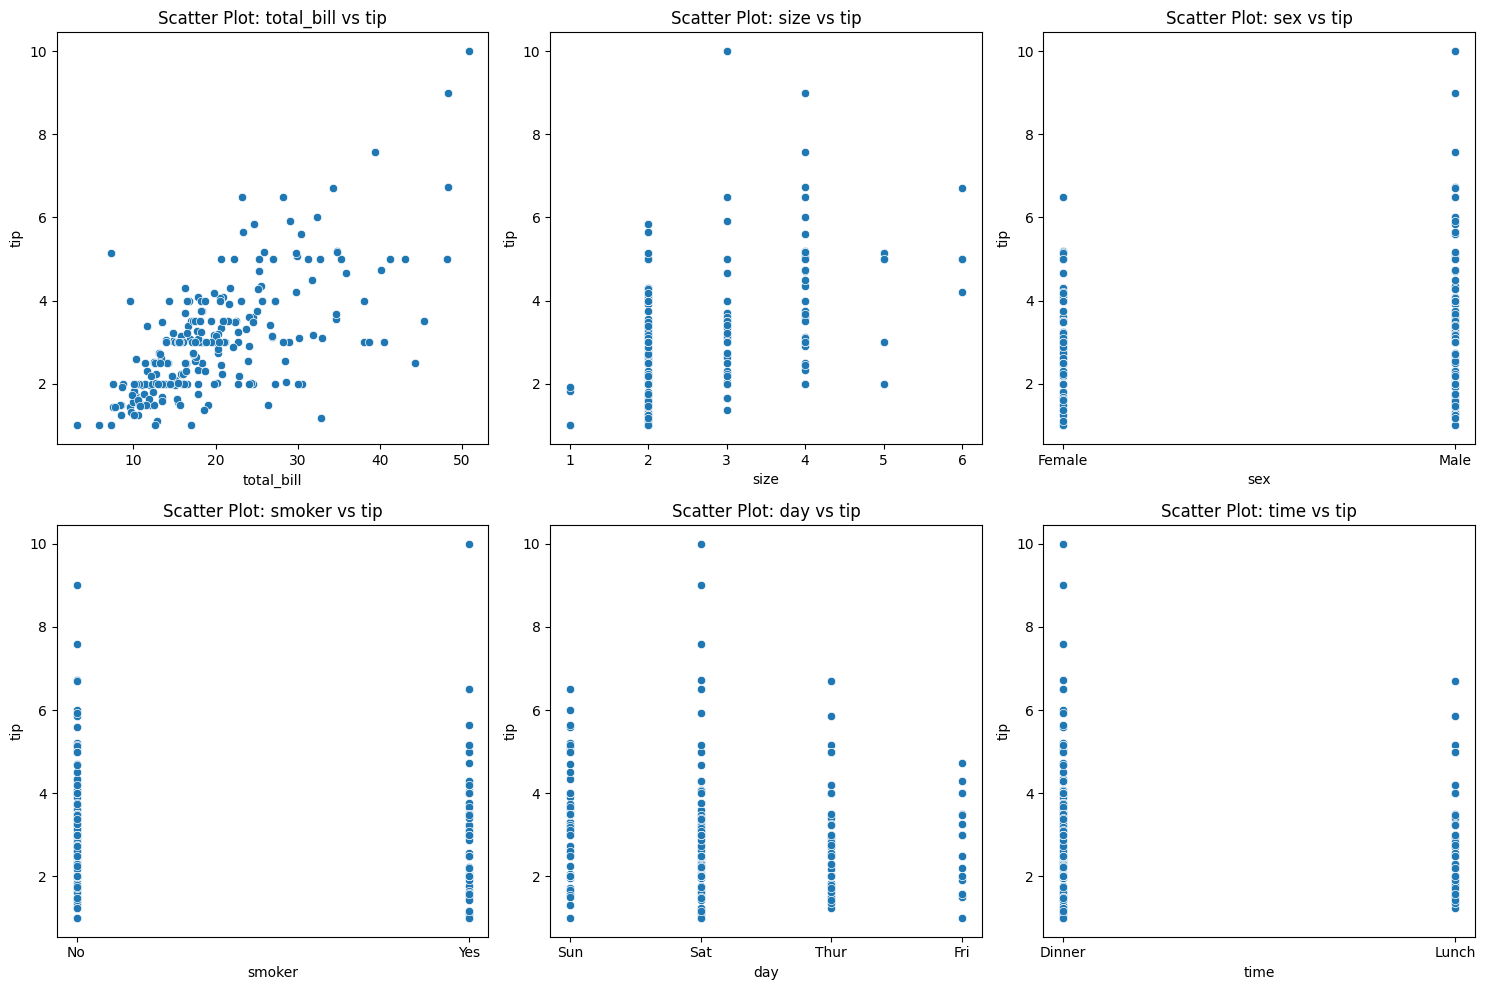

In [98]:
features = ['total_bill', 'size', 'sex', 'smoker', 'day', 'time'] 
target = 'tip'


plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=data, x=feature, y=target)
    plt.title(f"Scatter Plot: {feature} vs {target}")
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

### These are the Things we can conclude from the graphs presented above:-
A) Smokers and non-smokers tip about equally.

B) We notice that a higher amount of tip corresponds to a higher total bill.

C) Men tip noticably more than women do.

D) The highest variance in tips are received on the Saturday.

E) We also notice that the tip amount is higher for the dinner time compared to the lunch time.

F) the lowest amount of tips are received on the Friday.

### Performing Rainbow test to see the linearity :-

#### A low p-value suggests non-linearity, while a high p-value suggests linearity

In [99]:
X = sm.add_constant(encoded_data['total_bill']) 
y = encoded_data['tip']
model = sm.OLS(y, X).fit()

from statsmodels.stats.diagnostic import linear_rainbow
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print("Rainbow Test Statistic:", rainbow_statistic)
print("Rainbow Test p-value:", rainbow_p_value)

Rainbow Test Statistic: 1.2291480226129028
Rainbow Test p-value: 0.12911921525513964


In [100]:
X = sm.add_constant(encoded_data['size']) 
y = encoded_data['tip']
model = sm.OLS(y, X).fit()

from statsmodels.stats.diagnostic import linear_rainbow
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print("Rainbow Test Statistic:", rainbow_statistic)
print("Rainbow Test p-value:", rainbow_p_value)

Rainbow Test Statistic: 1.057130533913556
Rainbow Test p-value: 0.3804174610032263


### Constructing Different Regression Models :-

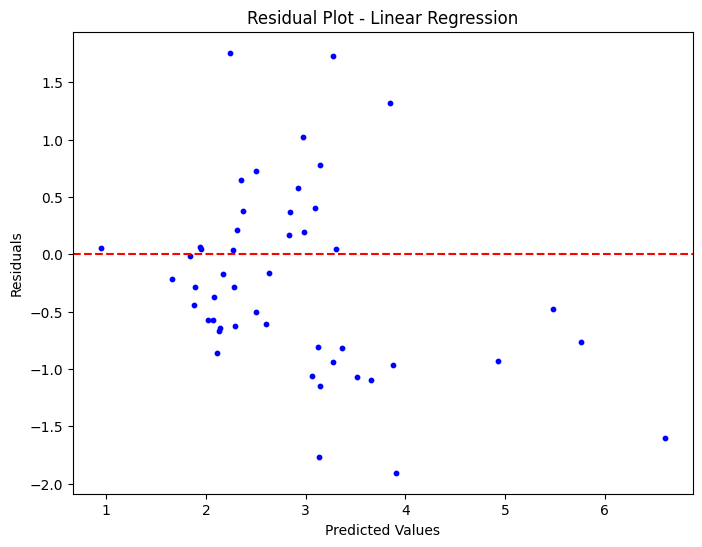

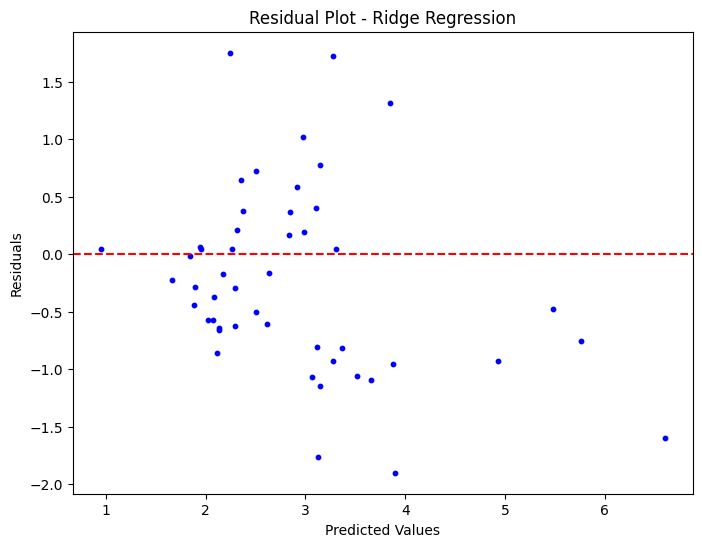

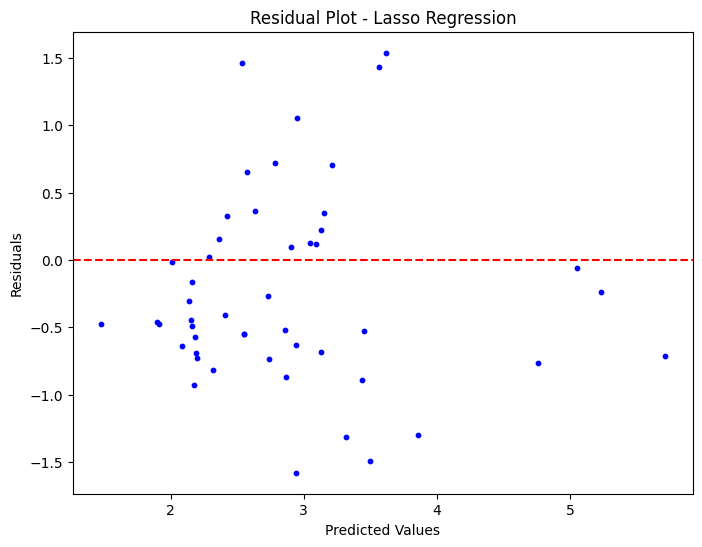

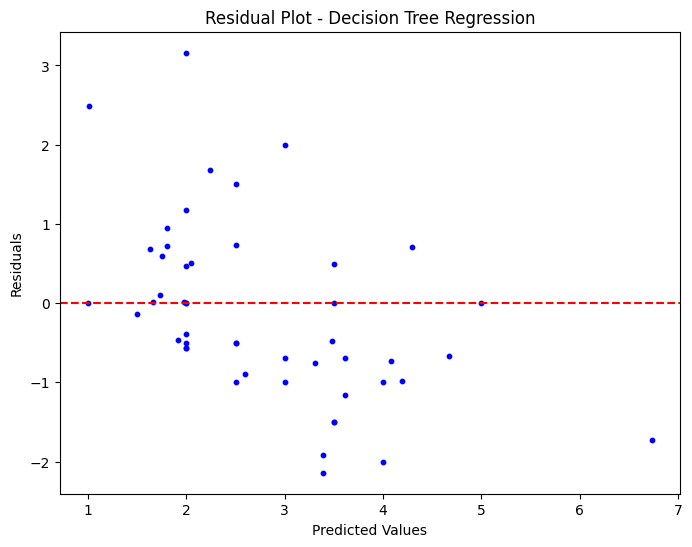

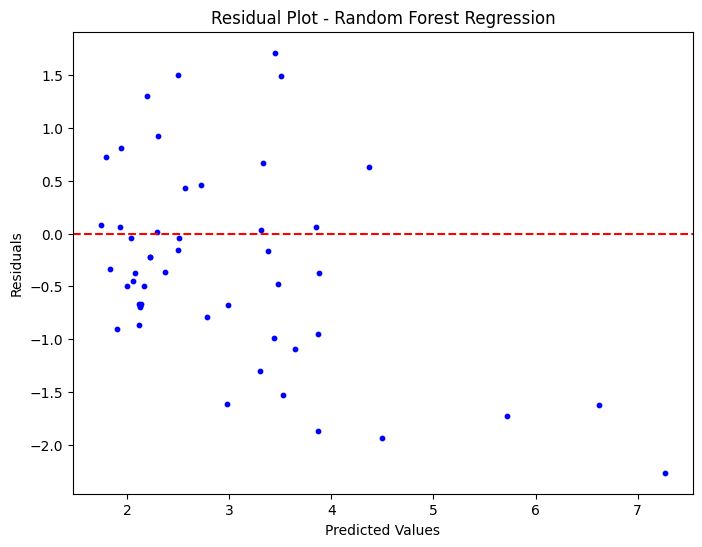

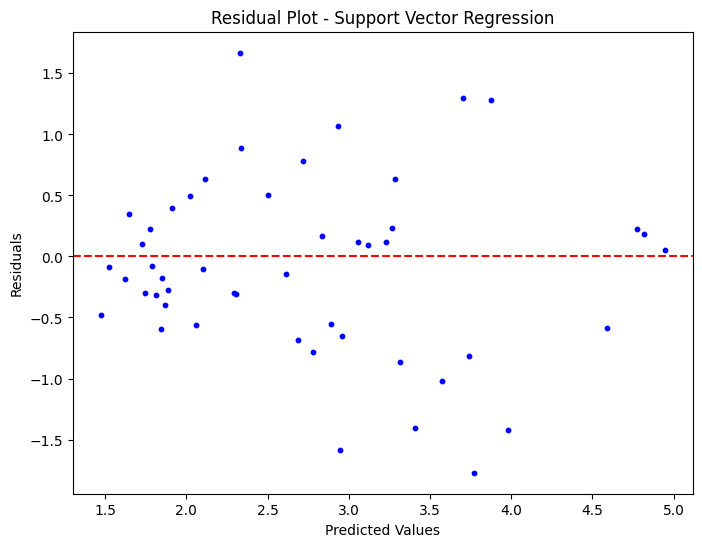

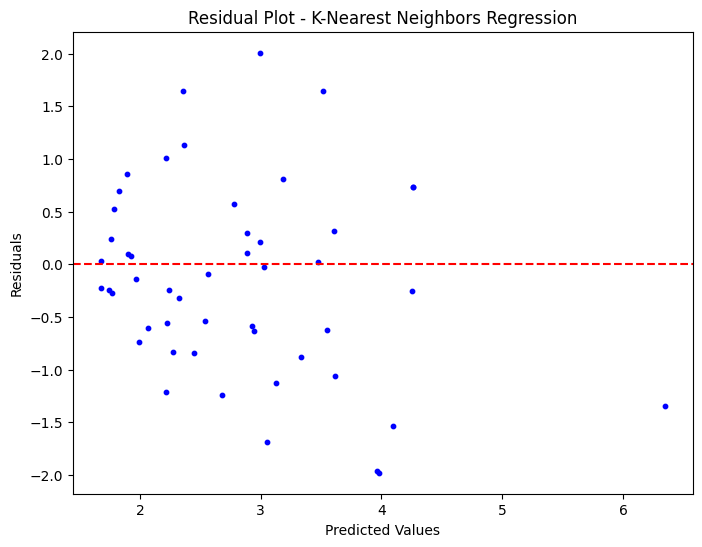

Result of the Models :-
Linear Regression:
  Mean Squared Error: 0.6948
  R-squared: 0.4441

Ridge Regression:
  Mean Squared Error: 0.6927
  R-squared: 0.4458

Lasso Regression:
  Mean Squared Error: 0.5666
  R-squared: 0.5467

Decision Tree Regression:
  Mean Squared Error: 1.2455
  R-squared: 0.0036

Random Forest Regression:
  Mean Squared Error: 0.9427
  R-squared: 0.2458

Support Vector Regression:
  Mean Squared Error: 0.5383
  R-squared: 0.5693

K-Nearest Neighbors Regression:
  Mean Squared Error: 0.8382
  R-squared: 0.3294



In [101]:
X = encoded_data.drop('tip', axis=1)
y = encoded_data['tip'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
  
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R^2': r2}
    

    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, color='blue', s=10)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Residual Plot - {name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

print("Result of the Models :-")

for model_name, metrics in results.items(): 
    print(f"{model_name}:")
    print(f"  Mean Squared Error: {metrics['MSE']:.4f}")
    print(f"  R-squared: {metrics['R^2']:.4f}\n")


### For Linear Regression on different Categorical Variables :-

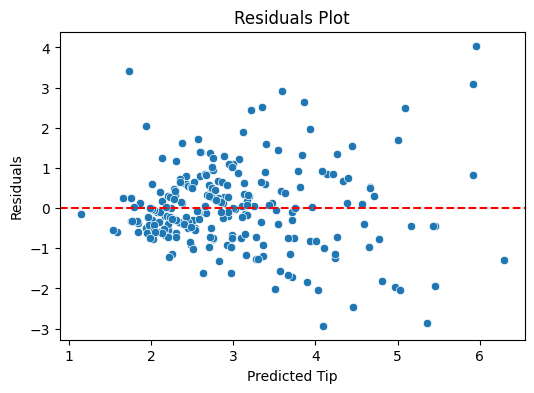

In [102]:
lin_reg = LinearRegression()
X = encoded_data[['total_bill', 'size']]
y = encoded_data['tip']
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

residuals = y - y_pred
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Predicted Tip")
plt.ylabel("Residuals")
plt.show()

In [103]:
X = encoded_data.drop(columns=['tip'])
y = encoded_data['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R^2: {r2:.2f}")

MAE: 0.67, RMSE: 0.83, R^2: 0.44


### The Linear Regression model results are as follows:
### Mean Absolute Error (MAE): 0.67
### Root Mean Squared Error (RMSE): 0.83
### R² score: 0.44

## Conclusion
To maximize tip rates, the business should adopt a more targeted and strategic approach:

A) Optimize Service Quality on Peak Days:

  -> Sundays: Since Sundays show higher tipping rates, it is essential to ensure that the best and most experienced staff are working on this day to provide excellent customer service. Consider offering exclusive promotions or personalized service to enhance the overall dining experience.
 
  -> Fridays: Given that Friday also has high potential for tips, the business should focus on improving service quality during this time. This could include offering special menu items, promoting an inviting atmosphere, and ensuring that staff are attentive and responsive to customers' needs.

B) Focus on Prime Dining Hours (Dinner Time):

  -> Dinner Service: Since tip rates are often higher during dinner hours, prioritize staffing during peak dinner times to ensure faster service, fewer delays, and better overall customer satisfaction. A dedicated "dinner service team" could be established to ensure a premium experience during these hours.

C) Prioritize Larger Parties:

  -> Groups and Large Parties: Given that larger groups tend to tip more generously, businesses should give them special attention. Staff should be trained to handle larger parties efficiently, ensuring they receive timely service and a positive experience. Offering group discounts or incentivizing large parties could also drive higher tip amounts.

D) Leverage Bill Amount for Tip Potential:

  -> Total Bill and Upselling: Since there is a correlation between the total bill and tip amounts, staff should be trained to upsell high-margin items or recommend drinks and desserts that can increase the total bill. Special promotions for higher-value items could be introduced to encourage customers to spend more, thereby increasing the tip potential.

By focusing on these key areas, businesses can drive better customer experiences and, in turn, increase the average tip rate, benefiting both the staff and the overall revenue.
